In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Industry_Portfolios.xlsx')

/opt/anaconda3/lib/python3.12/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [3]:
df = df.set_index('Date')

In [4]:
df

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16
200403,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63
200404,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76
200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86
...,...,...,...,...,...,...,...,...,...,...
201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87


# **Create a table showing the mean return and standard deviation of return for the ten industry portfolios.**

In [6]:
list_industry = df.columns
list_industry

Index(['NoDur', 'Durbl', 'Manuf', 'Enrgy', 'HiTec', 'Telcm', 'Shops', 'Hlth',
       'Utils', 'Other'],
      dtype='object')

In [7]:
new_df = pd.DataFrame()
mean_list=[]
std_list=[]

for i in list_industry:
    mean = mean_list.append(df[i].mean())
    std = std_list.append(df[i].std())


In [8]:
data = {'portfolio':df.columns, 'mean_return':mean_list, 'std_deviation':std_list}
df2 = pd.DataFrame(data)

In [9]:
df2 = df2.set_index('portfolio')

In [10]:
df2

,mean_return,std_deviation
portfolio,,
NoDur,0.902833,3.345657
Durbl,0.733333,8.361852
Manuf,1.012833,5.310270
Enrgy,1.231167,6.081524
HiTec,0.766250,5.381191
Telcm,0.881417,4.448284
Shops,0.916333,4.093786
Hlth,0.783833,3.787172
Utils,0.907167,3.701763


# **Plot the minimum-variance frontier (without the riskless asset) generated by the ten industry portfolios:**

>>*This graph must have expected (monthly) return on the vertical axis vs standard deviation of (monthly) return on the horizontal axis.*

>>*This graph must cover the range from 0% to 2% on the vertical axis, in increments of 0.1% (or less).*

In [12]:
#find V (Variance nxn Matrix)
V = df.cov()
V

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
NoDur,11.193422,18.449666,14.104907,10.531341,12.922949,11.968078,10.170832,9.953112,7.866653,14.438409
Durbl,18.449666,69.920577,39.178097,27.019794,35.466652,27.490543,27.444731,16.824003,12.746136,39.361987
Manuf,14.104907,39.178097,28.198970,23.145380,24.618739,19.550150,17.622867,13.596447,11.440612,26.313423
Enrgy,10.531341,27.019794,23.145380,36.984933,19.267276,15.366817,11.297800,9.630327,14.027168,18.320469
HiTec,12.922949,35.466652,24.618739,19.267276,28.957220,18.708273,17.837115,13.254064,10.304187,23.855470
Telcm,11.968078,27.490543,19.550150,15.366817,18.708273,19.787227,14.169356,11.506599,10.991596,19.610836
Shops,10.170832,27.444731,17.622867,11.297800,17.837115,14.169356,16.759084,10.178849,6.694350,19.226524
Hlth,9.953112,16.824003,13.596447,9.630327,13.254064,11.506599,10.178849,14.342669,7.475036,14.864553
Utils,7.866653,12.746136,11.440612,14.027168,10.304187,10.991596,6.694350,7.475036,13.703052,9.992960
Other,14.438409,39.361987,26.313423,18.320469,23.855470,19.610836,19.226524,14.864553,9.992960,31.163771


In [13]:
#find R (Return nx1 Matrix)
R = df2.mean_return.to_numpy()
R

array([0.90283333, 0.73333333, 1.01283333, 1.23116667, 0.76625   ,
       0.88141667, 0.91633333, 0.78383333, 0.90716667, 0.48908333])

In [14]:
#find e (nx1 Matrix of ones)
e = np.ones(len(mean_list))
e

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [15]:
#Calculate alpha
alpha = R.T @ np.linalg.inv(V) @ e
alpha

0.1379432386993192

In [16]:
#Calculate zeta
zeta = R.T @ np.linalg.inv(V) @ R
zeta

0.196408584644823

In [17]:
#Calculate delta
delta = e.T @ np.linalg.inv(V) @ e
delta

0.1373875973567121

In [18]:
#Calculate Rmv
Rmv = alpha / delta
Rmv

1.0040443340832612

In [19]:
Rp = np.arange(0, 2.01, 0.01)
Rp

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
       1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
       1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31,
       1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
       1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.

In [20]:
#Variance of return for frontier portfolio
var_p_squared = 1/delta + delta / (zeta*delta - alpha**2) * (Rp - Rmv)**2
sigma_p = np.sqrt(var_p_squared)
sigma_p

array([4.96865933, 4.93381464, 4.89907462, 4.8644415 , 4.82991758,
       4.79550523, 4.76120686, 4.72702495, 4.69296205, 4.65902076,
       4.62520378, 4.59151383, 4.55795374, 4.5245264 , 4.49123477,
       4.4580819 , 4.42507089, 4.39220496, 4.35948738, 4.32692151,
       4.29451081, 4.26225882, 4.23016916, 4.19824557, 4.16649185,
       4.13491193, 4.10350981, 4.0722896 , 4.04125553, 4.01041191,
       3.97976317, 3.94931385, 3.9190686 , 3.88903217, 3.85920946,
       3.82960543, 3.80022522, 3.77107404, 3.74215726, 3.71348034,
       3.68504889, 3.65686863, 3.62894542, 3.60128523, 3.57389417,
       3.54677848, 3.51994451, 3.49339877, 3.46714787, 3.44119855,
       3.41555771, 3.39023232, 3.36522952, 3.34055654, 3.31622076,
       3.29222964, 3.26859078, 3.24531187, 3.22240071, 3.19986521,
       3.17771336, 3.15595323, 3.13459299, 3.11364085, 3.09310513,
       3.07299416, 3.05331633, 3.03408008, 3.01529386, 2.99696612,
       2.97910534, 2.96171996, 2.94481839, 2.92840902, 2.91250

In [21]:
df3 = pd.DataFrame({'sigma_p': sigma_p, 'Rp': Rp})
df3

,sigma_p,Rp
0,4.968659,0.00
1,4.933815,0.01
2,4.899075,0.02
3,4.864441,0.03
4,4.829918,0.04
...,...,...
196,4.802074,1.96
197,4.836508,1.97
198,4.871053,1.98
199,4.905706,1.99


In [22]:
x_new = np.arange(0,6,1)
x_new

array([0, 1, 2, 3, 4, 5])

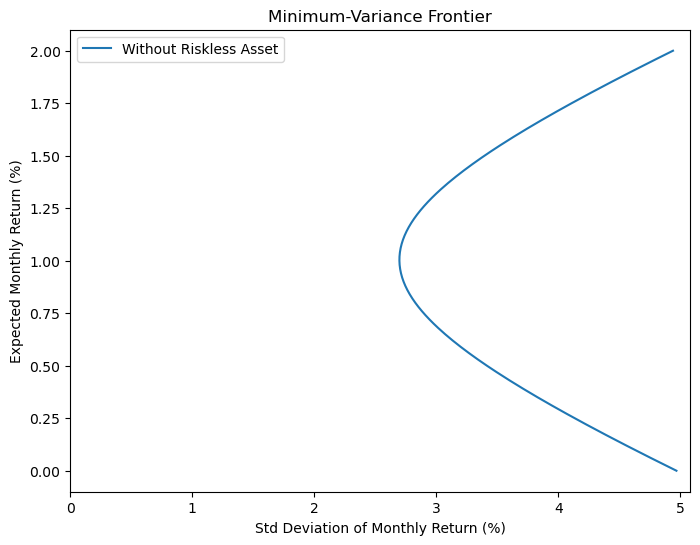

In [23]:
plt.figure(figsize = [8,6])
plt.plot(sigma_p, Rp,label='Without Riskless Asset')
plt.xlabel('Std Deviation of Monthly Return (%)')
plt.ylabel('Expected Monthly Return (%)')
plt.title('Minimum-Variance Frontier')
plt.xticks(x_new)
plt.legend()

# Briefly explain (in words, without mathematical equations or formulas) the economic significance and relevance of the minimum-variance frontier to an investor.

Investor's ultimate goal is to create an optimal portfolio to maximize utility. Thus, the minimum-variance frontier tries to fulfill that goal by identifying all 'efficient' or 'frontier' portfolios that minimise risk for a given mean return, or conversely, highest expected return given a specific amount of risk. The Sharpe ratio can also give the optimal portfolio that lies on this efficient frontier, resulting in the most optimum risk to return tradeoff. This frontier also suggests diversification, where investors can invest in assets that are not perfectly correlated to reduce risks while still maximizing returns.

# Now suppose that the (net) risk-free rate is 0.13% per month:

> Plot the efficient frontier (with the riskless asset) on the same graph as the minimum-variance frontier generated by the ten industry portfolios.

> Briefly explain the economic significance and relevance of the efficient frontier to an investor.

In [27]:
Rf = 0.13

In [28]:
new_Rp = np.arange(Rf,2.01,0.01)
new_Rp

array([0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23,
       0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34,
       0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44, 0.45,
       0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56,
       0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67,
       0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78,
       0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89,
       0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  ,
       1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11,
       1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22,
       1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33,
       1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44,
       1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55,
       1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.

In [29]:
sigma_p_square = (new_Rp - Rf)**2 / (zeta - 2 * alpha * Rf + delta * Rf * Rf)

In [30]:
sigma_p_square

array([0.00000000e+00, 6.14004737e-04, 2.45601895e-03, 5.52604263e-03,
       9.82407579e-03, 1.53501184e-02, 2.21041705e-02, 3.00862321e-02,
       3.92963032e-02, 4.97343837e-02, 6.14004737e-02, 7.42945732e-02,
       8.84166821e-02, 1.03766801e-01, 1.20344928e-01, 1.38151066e-01,
       1.57185213e-01, 1.77447369e-01, 1.98937535e-01, 2.21655710e-01,
       2.45601895e-01, 2.70776089e-01, 2.97178293e-01, 3.24808506e-01,
       3.53666729e-01, 3.83752961e-01, 4.15067202e-01, 4.47609453e-01,
       4.81379714e-01, 5.16377984e-01, 5.52604263e-01, 5.90058552e-01,
       6.28740851e-01, 6.68651159e-01, 7.09789476e-01, 7.52155803e-01,
       7.95750139e-01, 8.40572485e-01, 8.86622840e-01, 9.33901205e-01,
       9.82407579e-01, 1.03214196e+00, 1.08310436e+00, 1.13529476e+00,
       1.18871317e+00, 1.24335959e+00, 1.29923402e+00, 1.35633646e+00,
       1.41466691e+00, 1.47422537e+00, 1.53501184e+00, 1.59702632e+00,
       1.66026881e+00, 1.72473931e+00, 1.79043781e+00, 1.85736433e+00,
      

In [31]:
new_std = np.sqrt(sigma_p_square)

In [32]:
new_std

array([0.        , 0.02477912, 0.04955824, 0.07433736, 0.09911648,
       0.12389559, 0.14867471, 0.17345383, 0.19823295, 0.22301207,
       0.24779119, 0.27257031, 0.29734943, 0.32212855, 0.34690767,
       0.37168678, 0.3964659 , 0.42124502, 0.44602414, 0.47080326,
       0.49558238, 0.5203615 , 0.54514062, 0.56991974, 0.59469886,
       0.61947797, 0.64425709, 0.66903621, 0.69381533, 0.71859445,
       0.74337357, 0.76815269, 0.79293181, 0.81771093, 0.84249005,
       0.86726916, 0.89204828, 0.9168274 , 0.94160652, 0.96638564,
       0.99116476, 1.01594388, 1.040723  , 1.06550212, 1.09028123,
       1.11506035, 1.13983947, 1.16461859, 1.18939771, 1.21417683,
       1.23895595, 1.26373507, 1.28851419, 1.31329331, 1.33807242,
       1.36285154, 1.38763066, 1.41240978, 1.4371889 , 1.46196802,
       1.48674714, 1.51152626, 1.53630538, 1.5610845 , 1.58586361,
       1.61064273, 1.63542185, 1.66020097, 1.68498009, 1.70975921,
       1.73453833, 1.75931745, 1.78409657, 1.80887569, 1.83365

In [33]:
x = [0,6]
y = [Rmv,Rmv]

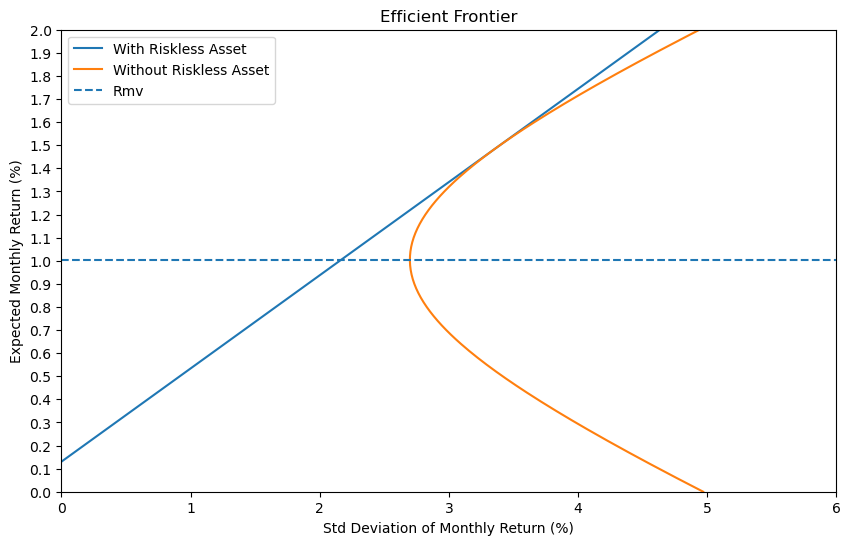

In [102]:
plt.figure(figsize = [10,6])
plt.plot(new_std, new_Rp,label='With Riskless Asset')
plt.plot(sigma_p, Rp,label='Without Riskless Asset')
# plt.scatter (sigma_p_2, Rp0)
plt.axhline(Rmv, label ='Rmv', linestyle = '--')

plt.xlabel('Std Deviation of Monthly Return (%)')
plt.ylabel('Expected Monthly Return (%)')
plt.title('Efficient Frontier')
plt.yticks(np.arange(0,2.1,0.1))
plt.ylim(0,2)
plt.xlim(0,6)
plt.legend()

> Briefly explain the economic significance and relevance of the efficient frontier to an investor.

# The two frontiers will intersect at single point: the tangency portfolio:

> Calculate the Sharpe ratio for the tangency portfolio, and also the tangency portfolio weights for the ten industry portfolios.

> Briefly explain the economic significance and relevance of the tangency portfolio to an investor.

In [37]:
SR = np.sqrt(zeta - 2 * alpha * Rf + delta * Rf**2)

In [38]:
SR

0.40356559934950903

In [39]:
# lb = (Rp - Rf) / (zeta - 2 * alpha * Rf + delta * Rf * Rf)

In [40]:
# lb

In [41]:
Rtg = (alpha * Rf - zeta) / (delta * Rf - alpha)

In [42]:
Rtg

1.4862735358446897

In [43]:
a = (zeta * np.dot(np.linalg.inv(V), e) - alpha * np.dot(np.linalg.inv(V), R)) / (zeta * delta - alpha ** 2)
a

array([ 0.49265898,  0.1080583 , -1.95244213, -0.01243221,  0.52952459,
       -0.26109318, -0.24849476,  0.28315077,  0.69575308,  1.36531657])

In [44]:
b = (delta * np.dot(np.linalg.inv(V), R) - alpha * np.dot(np.linalg.inv(V), e)) / (zeta * delta - alpha ** 2)
b

array([ 0.05067251, -0.21673729,  1.79411608,  0.07839701, -0.60080647,
        0.11143973,  0.83439661, -0.13966512, -0.37887357, -1.53293948])

In [45]:
w_star = a + np.dot(b, Rtg)

In [46]:
w_star

array([ 0.56797218, -0.2140726 ,  0.71410511,  0.10408719, -0.36343817,
       -0.09546326,  0.99164683,  0.0755702 ,  0.13264333, -0.91305081])

In [47]:
np.dot(w_star,e)

0.9999999999999991

In [48]:
df2['Portfolio Weight'] = w_star

In [49]:
df2[['Portfolio Weight']]

,Portfolio Weight
portfolio,
NoDur,0.567972
Durbl,-0.214073
Manuf,0.714105
Enrgy,0.104087
HiTec,-0.363438
Telcm,-0.095463
Shops,0.991647
Hlth,0.075570
Utils,0.132643


In [50]:
#Orthogonal Portfolio

Rp0 = Rmv - ((zeta * delta - alpha **2)/(delta**2 * (Rtg - Rmv)))
Rp0

0.12999999999999967

In [51]:
#Variance of return for frontier portfolio
var_p_squared_2 = 1/delta + delta / (zeta*delta - alpha**2) * (Rp0 - Rmv)**2
sigma_p_2 = np.sqrt(var_p_squared_2)
sigma_p_2

4.524526399957113